# Heart Disease Machine Learning (Classifications)

## Importing libraries

In [215]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sys
import os
from utils import utils

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB


## scikit modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Load metrics for predictive modeling
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import warnings
warnings.filterwarnings("ignore")

sys.setrecursionlimit(2147483647)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#Preparing folder variables
os.chdir(os.path.dirname(sys.path[0])) # This command makes the notebook the main path and can work in cascade.
main_folder = sys.path[0]
data_folder = (main_folder + "\data")
img_folder = (main_folder + "\images")

## Loading and checking the data

In [216]:
heartdf = pd.read_csv(data_folder + "/" + "heart.csv")

In [217]:
heartdf.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [218]:
heartdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [219]:
lista_colum = heartdf.columns.values.tolist()

In [220]:
for i in lista_colum:
  print(i)
  print(heartdf[i].unique())

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
[1 0]
cp
[3 2 1 0]
trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs
[1 0]
reste

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type 
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- target : have disease or not (1 = yes; 0 = No)

In [221]:
heartdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [222]:
heartdf.shape

(303, 14)

In [223]:
heartdf.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [224]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [225]:
# We take out the percentage of nulls in the df
((heartdf.isnull().sum() / len(heartdf))*100).sort_values(ascending = False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

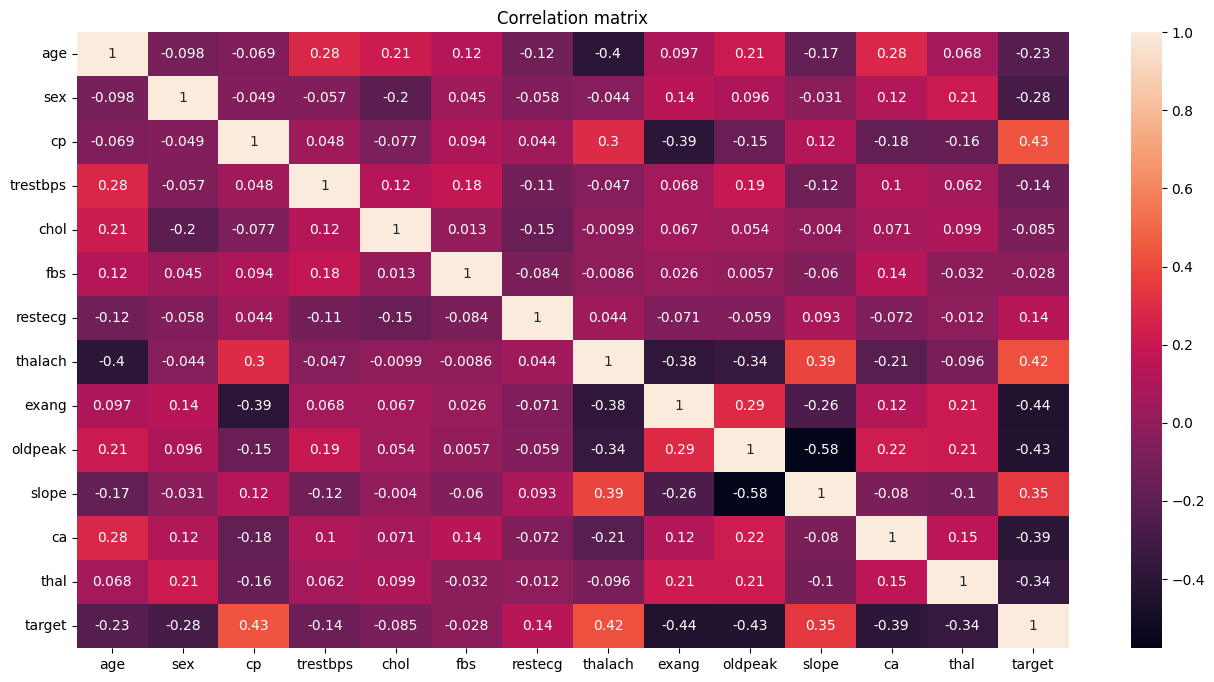

In [226]:
# There are a few variables with a moderate correlation with respect to the target, so the model should work well.
plt.rc("figure", figsize=(16, 8))

corr = heartdf.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.savefig(os.path.join(img_folder, 'Correlation matrix.png'),dpi=600)# Saving the image to the images folder
plt.show()
plt.close()# Close the plot

As we can see so far, the data is pretty much ready to use.

However, we could crete dummies for some of the columns, for example:
- thal
- slope
- cp

### Creación de variables ficticias (Dummy Variables)

In [227]:
b = pd.get_dummies(heartdf['thal'], prefix = "thal")
c = pd.get_dummies(heartdf['slope'], prefix = "slope")
e = pd.get_dummies(heartdf['cp'], prefix = "cp")

In [228]:
frames = [heartdf, b, c,e]
heartdf = pd.concat(frames, axis = 1)
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0,1,0,0,0,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,1,0,0,0,1,1,0,0,0


In [229]:
heartdf = heartdf.drop(columns = ["cp", "thal", "slope"])
heartdf.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,1,0,0,1,0,0,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,0,1,0,0,1,0,0,0,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,1,0,0,0,1,1,0,0,0


In [230]:
# let's have de df without dummies as well
heartdf_sin_dummies = pd.read_csv(data_folder + "/" + "heart.csv") 

## Model testing 

In [231]:
utils.gaussian_naive_bayes(heartdf_sin_dummies,0.1)

('gaussian_naive_bayes',
 0.8064516129032258,
 dict_items([('priors', None), ('var_smoothing', 1e-09)]))

In [232]:
utils.gaussian_naive_bayes(heartdf,0.1)

('gaussian_naive_bayes',
 0.8387096774193549,
 dict_items([('priors', None), ('var_smoothing', 1e-09)]))

In [233]:
utils.bernoulli(heartdf_sin_dummies,0.3)

('bernoulli',
 0.8021978021978022,
 dict_items([('alpha', 1.0), ('binarize', 0.0), ('class_prior', None), ('fit_prior', True), ('force_alpha', 'warn')]))

In [234]:
utils.bernoulli(heartdf,0.3)

('bernoulli',
 0.7912087912087912,
 dict_items([('alpha', 1.0), ('binarize', 0.0), ('class_prior', None), ('fit_prior', True), ('force_alpha', 'warn')]))

In [235]:
utils.multinomial(heartdf_sin_dummies,0.3)

('multinomial',
 0.7582417582417582,
 dict_items([('alpha', 1.0), ('class_prior', None), ('fit_prior', True), ('force_alpha', 'warn')]))

In [236]:
utils.multinomial(heartdf,0.3)

('multinomial',
 0.7802197802197802,
 dict_items([('alpha', 1.0), ('class_prior', None), ('fit_prior', True), ('force_alpha', 'warn')]))

In [237]:
utils.RandomForest(heartdf_sin_dummies,0.3)

('RandomForest',
 0.8021978021978022,
 dict_items([('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', 'sqrt'), ('max_leaf_nodes', None), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 100), ('n_jobs', None), ('oob_score', False), ('random_state', None), ('verbose', 0), ('warm_start', False)]))

In [238]:
utils.RandomForest(heartdf,0.3)

('RandomForest',
 0.8241758241758241,
 dict_items([('bootstrap', True), ('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', 'sqrt'), ('max_leaf_nodes', None), ('max_samples', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 100), ('n_jobs', None), ('oob_score', False), ('random_state', None), ('verbose', 0), ('warm_start', False)]))

In [239]:
utils.DecisionTree(heartdf_sin_dummies,0.3)

('DecisionTree',
 0.7252747252747253,
 dict_items([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', None), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))

In [240]:
utils.DecisionTree(heartdf,0.3)

('DecisionTree',
 0.7362637362637363,
 dict_items([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', None), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))

In [241]:
utils.SVCmodel(heartdf_sin_dummies,0.3)

('SVCmodel',
 0.6703296703296703,
 dict_items([('C', 1.0), ('break_ties', False), ('cache_size', 200), ('class_weight', None), ('coef0', 0.0), ('decision_function_shape', 'ovr'), ('degree', 3), ('gamma', 'scale'), ('kernel', 'rbf'), ('max_iter', -1), ('probability', False), ('random_state', None), ('shrinking', True), ('tol', 0.001), ('verbose', False)]))

In [242]:
utils.SVCmodel(heartdf,0.3)

('SVCmodel',
 0.6813186813186813,
 dict_items([('C', 1.0), ('break_ties', False), ('cache_size', 200), ('class_weight', None), ('coef0', 0.0), ('decision_function_shape', 'ovr'), ('degree', 3), ('gamma', 'scale'), ('kernel', 'rbf'), ('max_iter', -1), ('probability', False), ('random_state', None), ('shrinking', True), ('tol', 0.001), ('verbose', False)]))

In [243]:
utils.LogisticRegr(heartdf_sin_dummies,0.3)

('LogisticRegr',
 0.8131868131868132,
 dict_items([('C', 1.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 10000), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'lbfgs'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)]))

In [244]:
utils.LogisticRegr(heartdf,0.3)

('LogisticRegr',
 0.8461538461538461,
 dict_items([('C', 1.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 10000), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'lbfgs'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)]))

In [245]:
utils.knearest_find_k(heartdf_sin_dummies,0.3)

('knearest_find_k',
 0.7692307692307693,
 dict_items([('algorithm', 'brute'), ('leaf_size', 30), ('metric', 'manhattan'), ('metric_params', None), ('n_jobs', None), ('n_neighbors', 17), ('p', 2), ('weights', 'uniform')]))

In [246]:
utils.knearest_find_k(heartdf,0.3)

('knearest_find_k',
 0.7692307692307693,
 dict_items([('algorithm', 'brute'), ('leaf_size', 30), ('metric', 'manhattan'), ('metric_params', None), ('n_jobs', None), ('n_neighbors', 17), ('p', 2), ('weights', 'uniform')]))

### Modelos con dummies

In [247]:
df_con_dummies = pd.DataFrame(utils.models_con(heartdf))

In [248]:
df_con_dummies.iloc[df_con_dummies['Result'].argmax()]

Test_Size                                                                                                                                                                                                                                                                                                                                                                                                            0.1
Modelo                                                                                                                                                                                                                                                                                                                                                                                                      RandomForest
Result                                                                                                                                                                                

Random forest es el modelo que mejor resultado nos da usando el df con dummies con un resultado de 0.885246

### Modelos sin dummies

In [249]:
df_sin_dummies = pd.DataFrame(utils.models_sin(heartdf_sin_dummies))

In [250]:
df_sin_dummies.head(10)

,Test_Size,Modelo,Result,Hyperparameters
0,0.1,gaussian_naive_bayes,0.806452,"((priors, None), (var_smoothing, 1e-09))"
1,0.1,bernoulli,0.806452,"((alpha, 1.0), (binarize, 0.0), (class_prior, None), (fit_prior, True), (force_alpha, warn))"
2,0.1,multinomial,0.741935,"((alpha, 1.0), (class_prior, None), (fit_prior, True), (force_alpha, warn))"
3,0.1,RandomForest,0.838710,"((bootstrap, True), (ccp_alpha, 0.0), (class_weight, None), (criterion, gini), (max_depth, None), (max_features, sqrt), (max_leaf_nodes, None), (max_samples, None), (min_impurity_decrease, 0.0), (min_samples_leaf, 1), (min_samples_split, 2), (min_weight_fraction_leaf, 0.0), (n_estimators, 100), (n_jobs, None), (oob_score, False), (random_state, None), (verbose, 0), (warm_start, False))"
4,0.1,DecisionTree,0.709677,"((ccp_alpha, 0.0), (class_weight, None), (criterion, gini), (max_depth, None), (max_features, None), (max_leaf_nodes, None), (min_impurity_decrease, 0.0), (min_samples_leaf, 1), (min_samples_split, 2), (min_weight_fraction_leaf, 0.0), (random_state, None), (splitter, best))"
5,0.1,LogisticRegr,0.838710,"((C, 1.0), (class_weight, None), (dual, False), (fit_intercept, True), (intercept_scaling, 1), (l1_ratio, None), (max_iter, 10000), (multi_class, auto), (n_jobs, None), (penalty, l2), (random_state, None), (solver, lbfgs), (tol, 0.0001), (verbose, 0), (warm_start, False))"
6,0.1,knearest_find_k,0.806452,"((algorithm, brute), (leaf_size, 30), (metric, manhattan), (metric_params, None), (n_jobs, None), (n_neighbors, 18), (p, 2), (weights, uniform))"
7,0.1,SVCmodel,0.709677,"((C, 1.0), (break_ties, False), (cache_size, 200), (class_weight, None), (coef0, 0.0), (decision_function_shape, ovr), (degree, 3), (gamma, scale), (kernel, rbf), (max_iter, -1), (probability, False), (random_state, None), (shrinking, True), (tol, 0.001), (verbose, False))"
8,0.2,gaussian_naive_bayes,0.852459,"((priors, None), (var_smoothing, 1e-09))"
9,0.2,bernoulli,0.819672,"((alpha, 1.0), (binarize, 0.0), (class_prior, None), (fit_prior, True), (force_alpha, warn))"


In [251]:
df_sin_dummies.iloc[df_sin_dummies['Result'].argmax()]

Test_Size                                                                                                                                                                                                                                                                                                                                                                                                            0.2
Modelo                                                                                                                                                                                                                                                                                                                                                                                                      RandomForest
Result                                                                                                                                                                                

Random forest es el modelo que mejor resultado nos da usando el df sin dummies con  un resultado de 0.885246

## Model selection

Vamos a crear como ejemplo, dos csv para hacer el "submit".
- Uno con dummies usando RandomForestClassifier
- Uno sin dummies usando RandomForestClassifier

Aunque entregaremos el modelo sin dummies ya que es el que mejor resultado ha dado

## Predicction

### Con dummies

In [257]:
# Hacemos la predicción con Dummies
df_train_dummies = heartdf.drop(["target"],axis=1)
X = heartdf.drop(["target"],axis=1)
y = heartdf["target"]
Logi = RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
Logi.fit(X_train, y_train)

final_predict = Logi.predict(df_train_dummies)

predictive_model = pd.DataFrame({"Id" : df_train_dummies.index,
                                    "Prediction": final_predict
                                    }
                                )

predictive_model.head()

,Id,Prediction
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [258]:
# Exportarmos la predicción
# La exportamos en "csv"
predictive_model.to_csv(data_folder + "/" +'submission_heart.csv', index=False)

### Sin dummies

In [259]:
df_no_dummies = pd.read_csv(data_folder + "/" + "heart.csv") 
X = df_no_dummies.drop(["target"],axis=1)
y = df_no_dummies["target"]
df_no_dummies = pd.read_csv(data_folder + "/" + "heart.csv")
df_train_no_dummies = df_no_dummies.drop(["target"],axis=1)

In [260]:
# Hacemos la predicción con Dummies
Logi = RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
Logi.fit(X_train, y_train)

final_predict = Logi.predict(df_train_no_dummies)

predictive_model = pd.DataFrame({"Id" : df_train_no_dummies.index,
                                    "Prediction": final_predict
                                    }
                                )

predictive_model.head()

,Id,Prediction
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [261]:
# Exportarmos la predicción
# La exportamos en "csv"
predictive_model.to_csv(data_folder + "/" +'submission_heart_2.csv', index=False)